## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dense, Input
from keras.models import Model
import os
import keras
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, 
                      activation="relu", 
                      name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = Dense(units=n_units, 
                      activation="relu", 
                      name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
MONITOR = ['val_loss', 'val_accuracy']
EARLYSTOP = [5, 10, 25]

In [7]:
results = {}

for m, es in itertools.product(MONITOR, EARLYSTOP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print('MONITOR:', m, 'EARLYSTOP:', es)
    model = build_mlp(input_shape=x_train.shape[1:])
    #model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    earlystop = EarlyStopping(monitor=m, 
                              patience=es, 
                              verbose=1)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True, 
              callbacks=[earlystop])

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "%s-%s" % (str(m),str(es))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

MONITOR: val_loss EARLYSTOP: 5
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 347us/step - loss: 2.1714 - accuracy: 0.2789 - val_loss: 2.0970 - val_accuracy: 0.2404
Epoch 2/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.7412 - accuracy: 0.3923 - val_loss: 1.9501 - val_accuracy: 0.3140
Epoch 3/50
50000/50000 [==============================] - 17s 349us/step - loss: 1.6212 - accuracy: 0.4325 - val_loss: 1.8239 - val_accuracy: 0.3721
Epoch 4/50
50000/50000 [==============================] - 16s 326us/step - loss: 1.5485 - accuracy: 0.4564 - val_loss: 1.7323 - val_accuracy: 0.3970
Epoch 5/50
50000/50000 [==============================] - 15s 310us/step - loss: 1.4964 - accuracy: 0.4752 - val_loss: 1.6395 - val_accuracy: 0.4322
Epoch 6/50
50000/50000 [==============================] - 17s 331us/step - loss: 1.4521 - accuracy: 0.4934 - val_loss: 1.5889 - val_accuracy: 0.4355
Epoch 7/50
50000/50000 [=

50000/50000 [==============================] - 15s 299us/step - loss: 0.9196 - accuracy: 0.6924 - val_loss: 1.4618 - val_accuracy: 0.4962
Epoch 28/50
50000/50000 [==============================] - 15s 303us/step - loss: 0.8987 - accuracy: 0.7015 - val_loss: 1.4648 - val_accuracy: 0.4981
Epoch 29/50
50000/50000 [==============================] - 15s 297us/step - loss: 0.8818 - accuracy: 0.7069 - val_loss: 1.4639 - val_accuracy: 0.5018
Epoch 30/50
50000/50000 [==============================] - 15s 291us/step - loss: 0.8598 - accuracy: 0.7172 - val_loss: 1.4821 - val_accuracy: 0.4968
Epoch 00030: early stopping
MONITOR: val_loss EARLYSTOP: 25
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 312us/step - loss: 2.1792 - accuracy: 0.2789 - val_loss: 2.1359 - val_accuracy: 0.2013
Epoch 2/50
50000/50000 [==============================] - 16s 312us/step - loss: 1.7283 - accuracy: 0.3965 - val_loss: 1.9937 - val_accuracy: 0.2778
Epoc

50000/50000 [==============================] - 15s 298us/step - loss: 1.4841 - accuracy: 0.4855 - val_loss: 1.6370 - val_accuracy: 0.4254
Epoch 6/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.4396 - accuracy: 0.4991 - val_loss: 1.5829 - val_accuracy: 0.4414
Epoch 7/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.3990 - accuracy: 0.5165 - val_loss: 1.5399 - val_accuracy: 0.4577
Epoch 8/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.3639 - accuracy: 0.5281 - val_loss: 1.5259 - val_accuracy: 0.4614
Epoch 9/50
50000/50000 [==============================] - 15s 300us/step - loss: 1.3329 - accuracy: 0.5393 - val_loss: 1.5045 - val_accuracy: 0.4694
Epoch 10/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.3023 - accuracy: 0.5503 - val_loss: 1.4855 - val_accuracy: 0.4809
Epoch 11/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.2749 - accuracy: 0.5599 - val_lo

50000/50000 [==============================] - 15s 299us/step - loss: 0.9583 - accuracy: 0.6777 - val_loss: 1.4875 - val_accuracy: 0.4855
Epoch 26/50
50000/50000 [==============================] - 15s 299us/step - loss: 0.9375 - accuracy: 0.6864 - val_loss: 1.4921 - val_accuracy: 0.4871
Epoch 27/50
50000/50000 [==============================] - 15s 298us/step - loss: 0.9179 - accuracy: 0.6932 - val_loss: 1.4910 - val_accuracy: 0.4890
Epoch 28/50
50000/50000 [==============================] - 15s 298us/step - loss: 0.8978 - accuracy: 0.7012 - val_loss: 1.5003 - val_accuracy: 0.4851
Epoch 29/50
50000/50000 [==============================] - 16s 322us/step - loss: 0.8780 - accuracy: 0.7094 - val_loss: 1.5067 - val_accuracy: 0.4871
Epoch 30/50
50000/50000 [==============================] - 22s 436us/step - loss: 0.8561 - accuracy: 0.7177 - val_loss: 1.5123 - val_accuracy: 0.4867
Epoch 31/50
50000/50000 [==============================] - 18s 360us/step - loss: 0.8371 - accuracy: 0.7262 - va

Epoch 35/50
50000/50000 [==============================] - 15s 293us/step - loss: 0.7658 - accuracy: 0.7524 - val_loss: 1.5087 - val_accuracy: 0.4940
Epoch 36/50
50000/50000 [==============================] - 15s 293us/step - loss: 0.7434 - accuracy: 0.7607 - val_loss: 1.5177 - val_accuracy: 0.4915
Epoch 37/50
50000/50000 [==============================] - 15s 293us/step - loss: 0.7247 - accuracy: 0.7695 - val_loss: 1.5184 - val_accuracy: 0.4952
Epoch 38/50
50000/50000 [==============================] - 15s 297us/step - loss: 0.7062 - accuracy: 0.7756 - val_loss: 1.5281 - val_accuracy: 0.5008
Epoch 39/50
50000/50000 [==============================] - 15s 293us/step - loss: 0.6872 - accuracy: 0.7843 - val_loss: 1.5519 - val_accuracy: 0.4961
Epoch 40/50
50000/50000 [==============================] - 15s 292us/step - loss: 0.6697 - accuracy: 0.7905 - val_loss: 1.5655 - val_accuracy: 0.4896
Epoch 41/50
50000/50000 [==============================] - 15s 293us/step - loss: 0.6513 - accuracy:

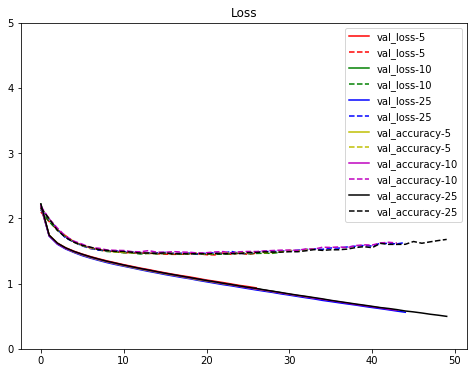

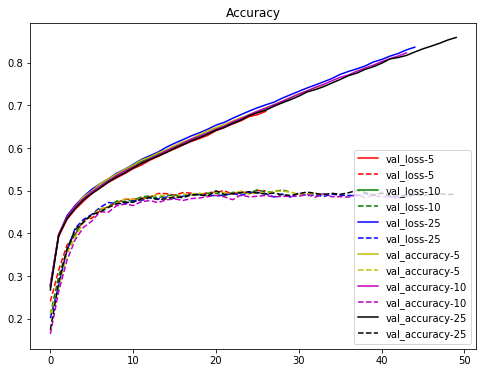

In [8]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()